In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA  # my dimensionality reduction 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder 


In [2]:
print('The country-data')
dataset = pd.read_csv('country-data.csv')
dataset.describe()

The country-data


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [3]:
# Getting information from the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# Check for missing values before replacement
print("Missing values before replacement:")
dataset.isnull().sum()    # No Missing values 

Missing values before replacement:


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
# checking if any value is NaN
dataset.isnull().values.any()    # No Nan values 

np.False_

In [6]:
dataset.shape   ## meaning there are 167 row and 10 columns 

(167, 10)

In [7]:
#checking the total number of countries
dataset['country'].value_counts()

country
Afghanistan            1
Albania                1
Algeria                1
Angola                 1
Antigua and Barbuda    1
                      ..
Vanuatu                1
Venezuela              1
Vietnam                1
Yemen                  1
Zambia                 1
Name: count, Length: 167, dtype: int64

In [8]:
# checking for duplicates
dataset.duplicated().any()

np.False_

In [9]:
#showing the top 10 countries with the highest GDP from your dataset
print('the top 10 countries with the highest GDP from your dataset')
dataset.groupby('country').sum().sort_values(['gdpp'],ascending=False).head(10)[['gdpp']]

the top 10 countries with the highest GDP from your dataset


,gdpp
country,
Luxembourg,105000
Norway,87800
Switzerland,74600
Qatar,70300
Denmark,58000
Sweden,52100
Australia,51900
Netherlands,50300
Ireland,48700


In [10]:
print('the top 10 countries with the lowest GDP from your dataset')
dataset.groupby('country').sum().sort_values(['gdpp'],ascending=False).tail(10)[['gdpp']]

the top 10 countries with the lowest GDP from your dataset


,gdpp
country,
Eritrea,482
Malawi,459
Central African Republic,446
Mozambique,419
Madagascar,413
Sierra Leone,399
Niger,348
"Congo, Dem. Rep.",334
Liberia,327


In [11]:
""" Life Expectancy = the number of years a person can expect to live """
#showing the top 10 countries with the highest life expectancy
dataset.groupby('country').sum().sort_values(['life_expec'],ascending=False)[['life_expec']].head(10)

,life_expec
country,
Japan,82.8
Singapore,82.7
Switzerland,82.2
Iceland,82.0
Australia,82.0
Spain,81.9
Italy,81.7
Sweden,81.5
France,81.4


In [12]:
#showing the top 10 countries with the lowest life expectancy
dataset.groupby('country').sum().sort_values(['life_expec'],ascending=False)[['life_expec']].tail(10)

,life_expec
country,
Afghanistan,56.2
Guinea-Bissau,55.6
Sierra Leone,55.0
Mozambique,54.5
South Africa,54.3
Malawi,53.1
Zambia,52.0
Central African Republic,47.5
Lesotho,46.5


In [13]:
#showing the top 10 countries with the highest income
dataset.groupby('country').sum().sort_values('income',ascending=False).head(10)[["income"]]

,income
country,
Qatar,125000
Luxembourg,91700
Brunei,80600
Kuwait,75200
Singapore,72100
Norway,62300
United Arab Emirates,57600
Switzerland,55500
United States,49400


In [14]:
#showing the top 10 countries with the lowest income
dataset.groupby('country').sum().sort_values('income',ascending=False).tail(10)[["income"]]

,income
country,
Sierra Leone,1220
Togo,1210
Guinea,1190
Malawi,1030
Mozambique,918
Central African Republic,888
Niger,814
Burundi,764
Liberia,700


<Figure size 1000x500 with 0 Axes>

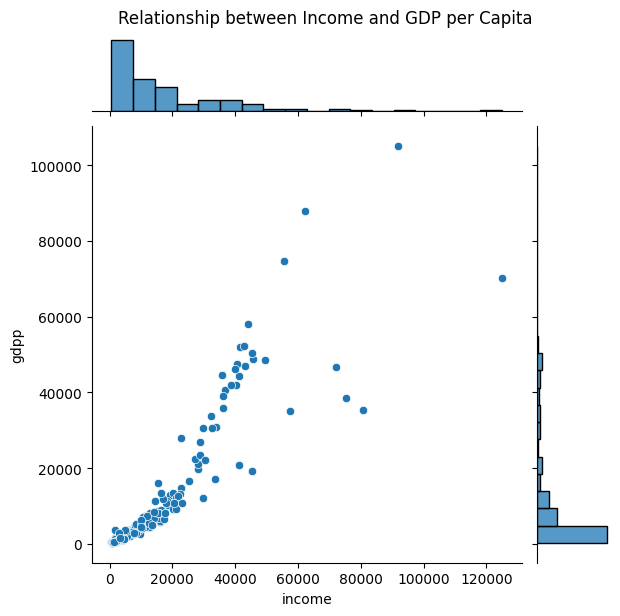

<Figure size 640x480 with 0 Axes>

In [15]:
""" plt.title('Income vs. GDP per Capita': Exploring Economic Prosperity """ 

plt.figure(figsize=(10,5))
sns.jointplot(data=dataset,x='income',y='gdpp')
plt.suptitle('Relationship between Income and GDP per Capita', y=1.02)
plt.show()
plt.tight_layout()

In [16]:
""" Each point in the chart above represents a country, and its position indicates how much income its citizens earn and the country's overall 
     economic output per person.
     Trend: Countries with higher incomes tend to have higher GDP per capita, as seen by the upward trend of the points.
     Outliers: Some countries may have high income but relatively low GDP per capita, or vice versa, indicating unique economic conditions.
     The chart helps to understand how income and GDP per capita are related and identify countries that stand out from the general trend. 
"""

" Each point in the chart above represents a country, and its position indicates how much income its citizens earn and the country's overall \n     economic output per person.\n     Trend: Countries with higher incomes tend to have higher GDP per capita, as seen by the upward trend of the points.\n     Outliers: Some countries may have high income but relatively low GDP per capita, or vice versa, indicating unique economic conditions.\n     The chart helps to understand how income and GDP per capita are related and identify countries that stand out from the general trend. \n"

<Figure size 1000x1000 with 0 Axes>

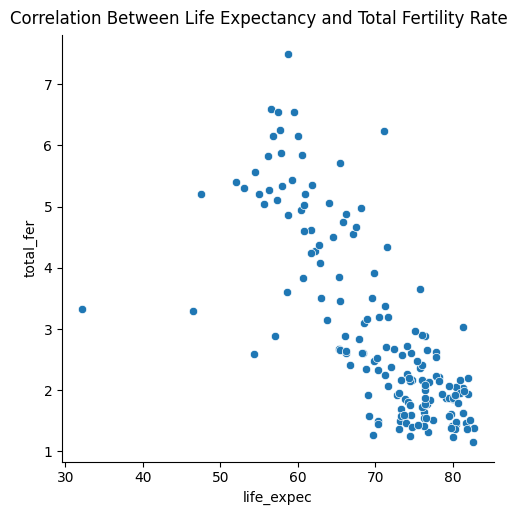

In [17]:
""" the relationship between life expectancy and total fertility rate, in order to understand how the two variables correlate.  """
plt.figure(figsize=(10,10))
sns.relplot(data=dataset,x='life_expec',y='total_fer')
plt.suptitle('Correlation Between Life Expectancy and Total Fertility Rate', y=1.02)
plt.show()

<Axes: xlabel='country'>

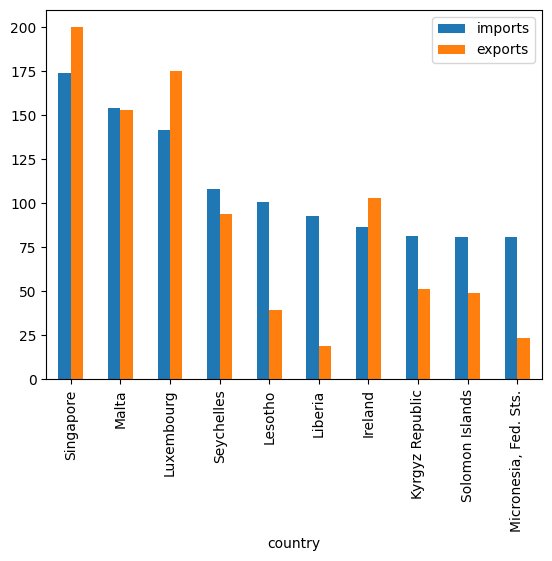

In [18]:
#comparing the import and export values for the top 10 countries
dataset.groupby('country').sum().sort_values(["imports","exports"],ascending=False)[['imports','exports']].head(10).plot(kind='bar')

In [19]:
# Initialize LabelEncoder, # A module use to convert categorical labels into numeric labels.
label_encoder = LabelEncoder()

# Fit and transform the 'Sex' column
dataset['country'] = label_encoder.fit_transform(dataset['country'])

# printing the dataset
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [20]:
# Define the new column names
new_column_names = {
    'child_mort': 'Child_Mortality',
    'exports': 'Exports',
    'health': 'Health_Expenditure',
    'imports': 'Imports',
    'income': 'Income',
    'inflation': 'Inflation',
    'life_expec': 'Life_Expectancy',
    'total_fer': 'Total_Fertility',
    'gdpp': 'GDP'
}

# Rename the columns
dataset = dataset.rename(columns=new_column_names)


In [21]:
#redefined column names
print("printing the dataset after renaming the columns")
dataset

printing the dataset after renaming the columns


,country,Child_Mortality,Exports,Health_Expenditure,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


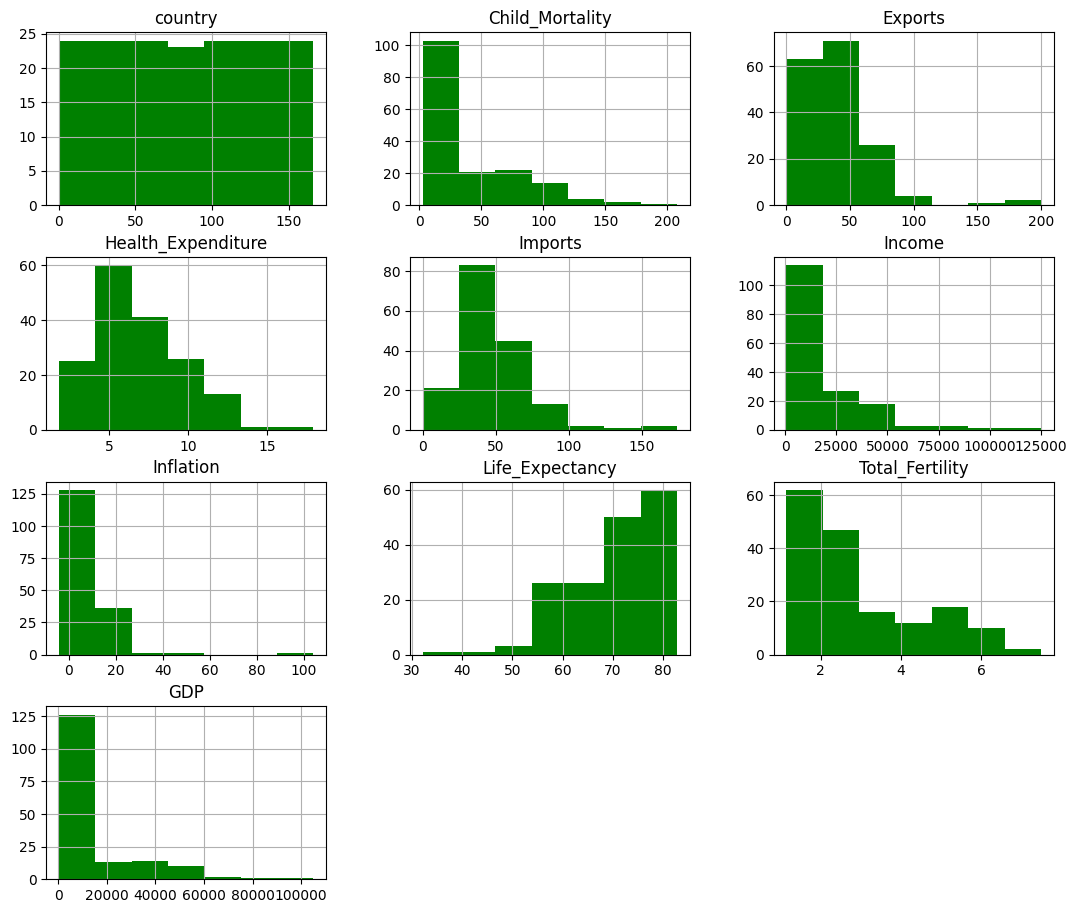

<Figure size 640x480 with 0 Axes>

In [22]:
# using the Histogram  chart checking for any outliers
dataset.hist(bins =7,figsize=(13,11),color='green')
plt.show()
plt.tight_layout()

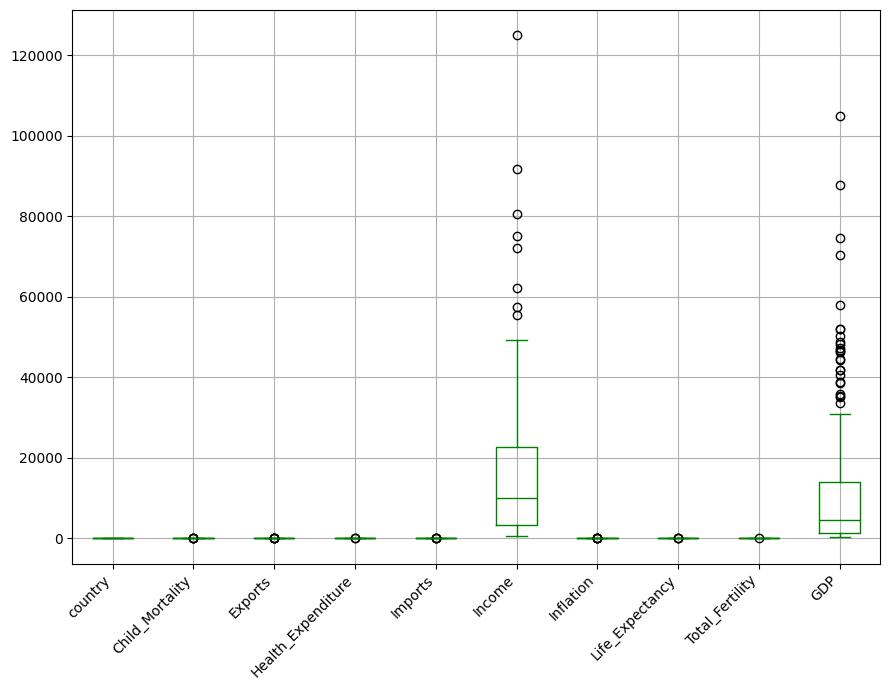

In [23]:
# using the Histogram chart checking for any outliers
dataset.boxplot(figsize=(9,7),color='green') 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# now we standardizing the data 
# ie we bring the columns that are far from each other to be closer
# Here we will use the standard scaler

scaler = StandardScaler()   # we initially tried Robust Scaler then reverted back to Standard Scaler
data_norm = scaler.fit_transform(dataset)    # the data_norm variable will be the data normalizing
data_norm = pd.DataFrame(data_norm, columns=dataset.columns)  # we change our data bac to dataFrame
data_norm.head()

# this is our new data now for analyzing """

,country,Child_Mortality,Exports,Health_Expenditure,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


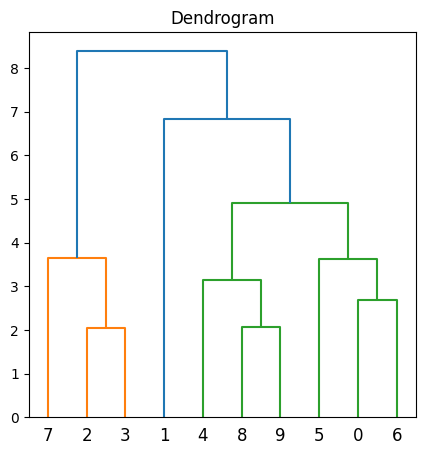

In [25]:
# dendrogram to find the number of clusters 

subset_data = data_norm.sample(n=10)
plt.figure(figsize=(5,5))
plt.title('Dendrogram')
my_dendrogram = shc.dendrogram(shc.linkage(subset_data, method='ward')) # we only plot subset data not All

# all dendrogram might not be the same as others, there is no really a straight forward way as to where to cut, but know or break 


In [26]:
#now focusing on the machine learning 
# finding the k means value 
# then categorize into 4 groups

In [27]:
"""  
To determine the optimal k value (number of clusters) for the K-Means clustering, better to analyze the Silhouette Scores or the Elbow Method. 
the Silhouette Scores are calculated for k values ranging from 2 to 10. The k value with the highest Silhouette Score is considered the optimal number of clusters.
"""

'  \nTo determine the optimal k value (number of clusters) for the K-Means clustering, better to analyze the Silhouette Scores or the Elbow Method. \nthe Silhouette Scores are calculated for k values ranging from 2 to 10. The k value with the highest Silhouette Score is considered the optimal number of clusters.\n'

silhouette_score for k=2: 0.2762857366688946
silhouette_score for k=3: 0.24616663685598536
silhouette_score for k=4: 0.24484340399995286
silhouette_score for k=5: 0.2452333665591869
silhouette_score for k=6: 0.1734065154053134
silhouette_score for k=7: 0.17413515898817294
silhouette_score for k=8: 0.1850320423174486
silhouette_score for k=9: 0.1891958420350665
silhouette_score for k=10: 0.1720530783519565


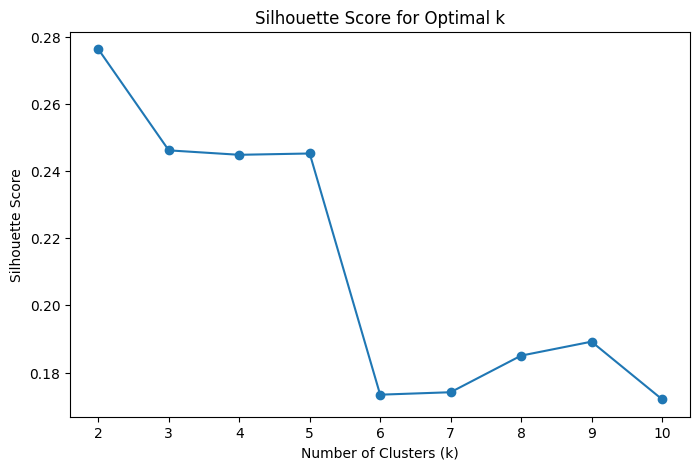

In [28]:
# using silhouette_score to determine the k value
# silhouette_score ranges from -1 to 1, if score near zero there will be an overlapping 
# higher scores means well defined clusters 
# negative score means there will be an incorrect cluster assignment 
silhouette_scores = []
range_of_k = range(2, 11)

for k in range_of_k:
    cluster = AgglomerativeClustering(n_clusters=k, metric= 'euclidean', linkage='ward')   # a loop is written here
    cluster_labels = cluster.fit_predict(data_norm)    

    # calculating the sillhoute_score
    score = silhouette_score(data_norm, cluster_labels)
    silhouette_scores.append(score)
    print(f'silhouette_score for k={k}: {score}')
        
    # Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_of_k, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [29]:
 #Find the optimal k value
optimal_k = range_of_k[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters (k) is: {optimal_k}")

The optimal number of clusters (k) is: 2


In [30]:
""" How to Find Your Optimal k Value
    Plot the Silhouette Scores to generate a plot of Silhouette Scores for each k value
    The k value corresponding to the highest score is your optimal number of clusters.
    so, the k value is K 2 = 0.28
    
    The Silhouette Score matters because, it provides a clear metric to evaluate the quality of clustering.
    It also helps to avoid overfitting (too many clusters) or under-fitting (too few clusters).
. """

' How to Find Your Optimal k Value\n    Plot the Silhouette Scores to generate a plot of Silhouette Scores for each k value\n    The k value corresponding to the highest score is your optimal number of clusters.\n    so, the k value is K 2 = 0.28\n    \n    The Silhouette Score matters because, it provides a clear metric to evaluate the quality of clustering.\n    It also helps to avoid overfitting (too many clusters) or under-fitting (too few clusters).\n. '

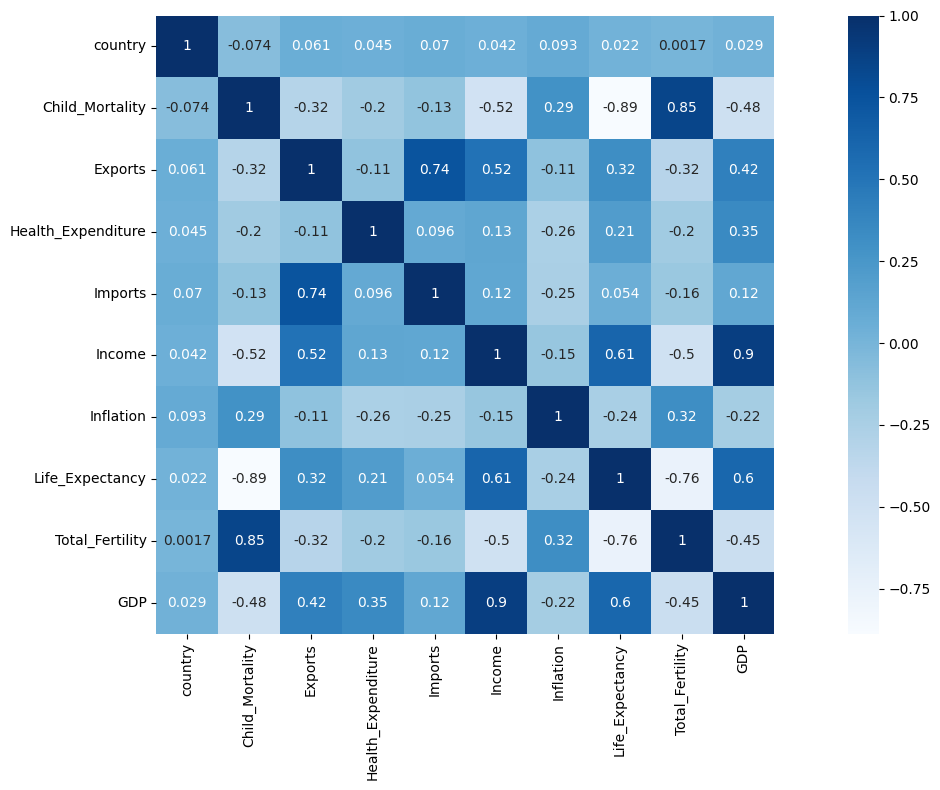

In [31]:
# Calculate the correlation matrix
dataset_numerical = dataset
corr_matrix = dataset_numerical.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', square=True)  
plt.tight_layout()
plt.show()

In [ ]:
"""     
        Strong Relationships:
        Countries with higher incomes tend to have higher GDP (correlation = 0.9).
        Higher child mortality is strongly linked to lower life expectancy (correlation = -0.89).

        Weak Relationships:
        Exports and health expenditure have little to no relationship (correlation = -0.11).     
"""

'     \n        Strong Relationships:\n        Countries with higher incomes tend to have higher GDP (correlation = 0.9).\n        "Higher child mortality is strongly linked to lower life expectancy (correlation = -0.89).\n\n        Weak Relationships:\n        Exports and health expenditure have little to no relationship (correlation = -0.11).     \n'

In [33]:
# dimensionality reduction
# we try to observe all the data and reduce into 4 component
pca = PCA(n_components=4)
reducing_data = pca.fit_transform(data_norm)

In [34]:
#printing my reduced data ie into 4
reducing_data

array([[-2.95874232e+00, -6.92279156e-02, -1.06944146e+00,
        -5.30016651e-01],
       [ 3.82715713e-01, -7.64843547e-01, -7.74704538e-01,
        -1.78788643e+00],
       [-3.30795780e-01, -6.08983382e-01,  7.43648978e-01,
        -1.97295763e+00],
       [-2.97509043e+00,  1.54836064e+00,  1.02775453e+00,
        -1.29599294e+00],
       [ 9.88175357e-01, -4.00274948e-02, -6.88949819e-01,
        -1.72976251e+00],
       [-2.14992412e-02, -1.90984851e+00,  5.46810253e-01,
        -1.09453282e+00],
       [-1.45772030e-01, -7.30837666e-01, -2.14455650e-01,
        -2.05540163e+00],
       [ 2.29695235e+00, -2.14402989e+00, -1.51701508e-01,
        -6.78017707e-01],
       [ 2.92998049e+00, -8.94607329e-01, -8.36694893e-01,
        -3.76431101e-01],
       [-2.23347186e-01, -5.46690166e-01,  4.45789764e-01,
        -1.57572939e+00],
       [ 1.22612591e+00, -8.18355289e-01, -8.57215167e-01,
        -1.06070951e+00],
       [ 1.63004230e+00,  4.09332283e-01,  5.17475580e-01,
      

In [35]:
data_norm

,country,Child_Mortality,Exports,Health_Expenditure,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,1.638736,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,1.659480,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,1.680223,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,1.700967,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [36]:
## agglomerative clustering
my_agglomerative_cluster = AgglomerativeClustering(n_clusters=4, metric= 'euclidean', linkage='ward')
now = my_agglomerative_cluster.fit_predict(reducing_data)
now

array([1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       3, 2, 2, 2, 2, 1, 1, 0, 2, 3, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2,
       1, 0, 3, 2, 1, 2, 2, 0, 2, 3, 2, 3, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       3, 3, 1, 1, 3, 0, 1, 0, 2, 2, 2, 2, 3, 0, 2, 2, 1, 2, 0, 2, 2, 0,
       1, 0, 0, 0, 1, 1, 2, 3, 1, 2, 1, 2, 3, 3, 2, 1, 0, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 3, 3, 2, 2, 1, 1, 2, 1, 1])

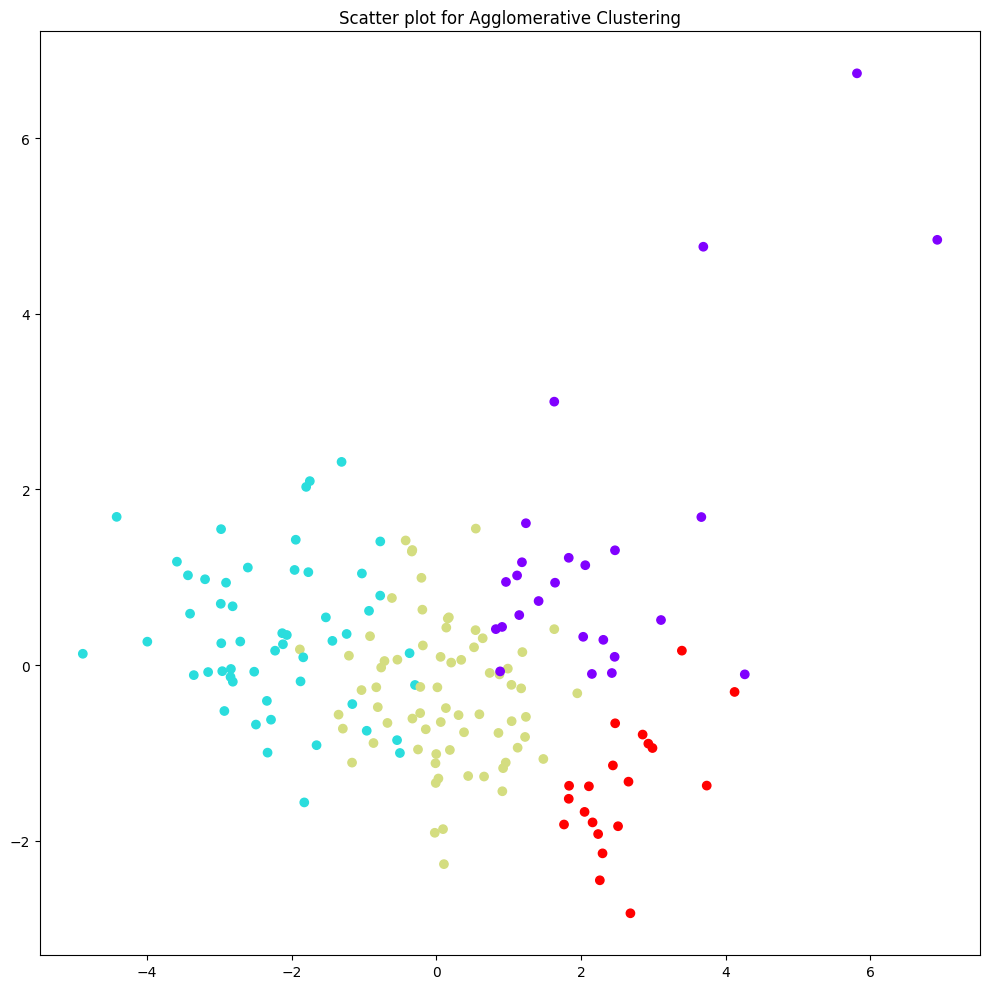

In [37]:
#plotting the results using scatter plot
plt.figure(figsize=(10,10))
plt.scatter(x=reducing_data[:, 0], y=reducing_data[:, 1], c=now, cmap='rainbow')
plt.title('Scatter plot for Agglomerative Clustering')
plt.tight_layout()

In [38]:
"""
The Agglomerative Clustering is a type of hierarchical clustering where data points are grouped into clusters based on their similarity.
It starts by treating each data point as its own cluster and then merges the closest clusters step by step until all points belong to a single cluster.

The scatter plot visualizes the clusters formed by the Agglomerative Clustering algorithm, with each point represents a data point from the dataset.
Colors represent different clusters, pointing with the same color belong to the same cluster.
The x-axis and y-axis represent the two dimensions of the reduced data such as the PCA technique.
"""

'\nThe Agglomerative Clustering is a type of hierarchical clustering where data points are grouped into clusters based on their similarity.\nIt starts by treating each data point as its own cluster and then merges the closest clusters step by step until all points belong to a single cluster.\n\nThe scatter plot visualizes the clusters formed by the Agglomerative Clustering algorithm, with each point represents a data point from the dataset.\nColors represent different clusters, pointing with the same color belong to the same cluster.\nThe x-axis and y-axis represent the two dimensions of the reduced data such as the PCA technique.\n'